In [60]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
plt.ioff()
all_res = {}

in_dir = "/eos/user/g/gkrzmanc/temporary_results_inference1.pkl"
in_dir2 = "/eos/user/g/gkrzmanc/temporary_results_inference1_part2.pkl"

results = pickle.load(open(in_dir, "rb"))
results2 = pickle.load(open(in_dir2, "rb"))
results.update(results2)
all_res["EGNN"] = results
radiuses = sorted(list(results.keys()))
print(radiuses)
radiuses = radiuses[:8]
#print(radiuses)
#radiuses = radiuses[:4]
#all_res["hgcal"] = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/hgcal_model/result_e_frac11.pkl", "rb"))
all_res["HEGNN"] = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/HEGNN_CORRECTED_250evt.pkl", "rb"))
#all_res["hgcal_further_train"] = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/hgcal_appr_furt_train.pkl", "rb"))
all_res.keys()

[0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25]


dict_keys(['EGNN', 'HEGNN'])

In [61]:
loss_e_fracs = {key: [np.median(np.array(all_res[key][r]["loss_e_fracs"])) for r in sorted(list(all_res[key].keys()))] for key in all_res}
loss_e_fracs_true = {key: [np.median(np.array(all_res[key][r]["loss_e_fracs_true"])) for r in sorted(list(all_res[key].keys()))] for key in all_res}


In [62]:
#loss_e_fracs["hgcal_further_train"]

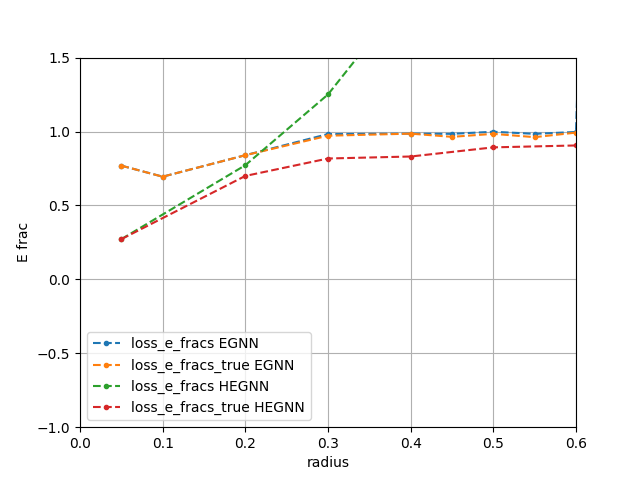

In [66]:
fig, ax = plt.subplots()
for key in loss_e_fracs:
    radiuses = sorted(list(all_res[key].keys()))
    ax.plot(radiuses, loss_e_fracs[key], ".--", label="loss_e_fracs " + str(key))
    ax.plot(radiuses, loss_e_fracs_true[key], ".--", label="loss_e_fracs_true "+ str(key))



ax.set_xlabel("radius")
ax.set_ylabel("E frac")
ax.legend()
ax.grid()
ax.set_ylim([-1, 1.5])
ax.set_xlim([0, 0.6])
fig.savefig("/eos/user/g/gkrzmanc/temp_fig.png")
# display fig
from IPython.display import Image
Image(filename='/eos/user/g/gkrzmanc/temp_fig.png')
#ig.show()

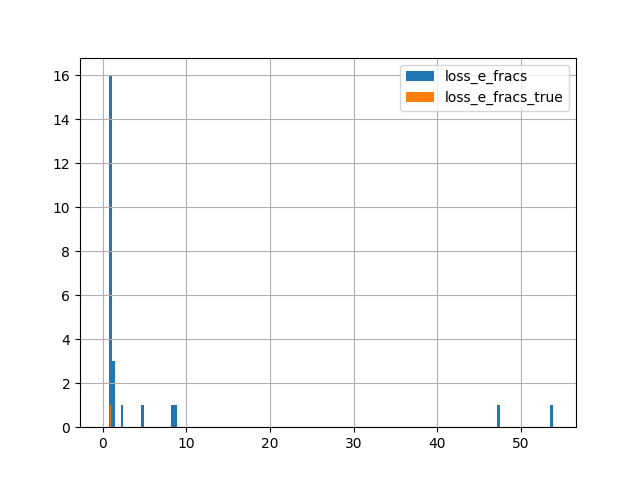

In [67]:

loss_e_fracs = results[0.5]["loss_e_fracs"]
loss_e_fracs_true = results[0.5]["loss_e_fracs_true"]
fig, ax = plt.subplots()
ax.hist(loss_e_fracs, bins=150, label="loss_e_fracs")
ax.hist(loss_e_fracs_true, bins=150, label="loss_e_fracs_true")
ax.legend()
ax.grid()
#ax.set_xlim([0, 1.4])
fig.savefig("/eos/user/g/gkrzmanc/temp_fig.png")
# display fig
from IPython.display import Image
Image(filename='/eos/user/g/gkrzmanc/temp_fig.png')
